<a href="https://colab.research.google.com/github/GulchinTaghizade/Regression_Modeling_Experiment/blob/main/ProjectForMathML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE for training set: 10.345332446485601
MSE for test set: 10.07969018805733
MSE for training set (Flexible Model): 10.343917567360918
MSE for test set (Flexible Model): 10.050724615343807
MSE for training set (More Flexible Model): 11.349201415600522
MSE for test set (More Flexible Model): 11.899978998955936


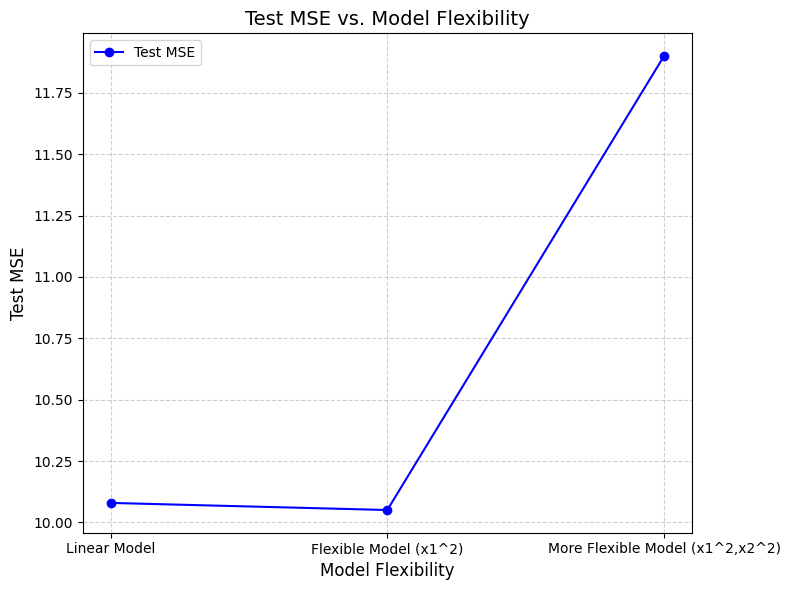

In [15]:
import random
import numpy as np
import math

# STEP 1: CREATION OF DATA
# Set random seed for reproducibility
random.seed(42)

# Number of observations
n=1000

X=[]  # Matrix of observations
y=[]  # Matrix of response


# Generate 5 input features (x1, x2, x3, x4, x5)

for i in range(n):
    # Generate random values for each feature
    x1 = random.uniform(0, 1)  # Uniform distribution in [0, 1]
    x2 = random.gauss(2, 2)     # Normal distribution with mean=2, std=2
    x3 = random.expovariate(1)  # Exponential distribution with rate=1
    x4 = random.normalvariate(0, 1)  # Normal distribution with mean=0, std=1
    x5 = random.uniform(-5, 5)  # Uniform distribution in [-5, 5]

    # Store the features in the list X
    X.append([x1, x2, x3, x4, x5])



# Connection of response variable y with features (x1,x2,x3,x4,x5) and some noise
# y = x1 + x2 - 5*x3 + 0.7*x4 - 3*x5 + noise
for x in X:
  noise=random.randint(-5,5)
  y_value=x[0]+x[1]-5*x[2]+0.7*x[3]-3*x[4]+noise
  y.append(y_value)

# Split data into training (80%) and test (20%) sets
train_size = int(0.8 * n)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Add a column of ones to X for the intercept term (w0)
X_train_with_intercept = [[1] + x for x in X_train]
X_test_with_intercept = [[1] + x for x in X_test]

# STEP 2: LEAST SQUARES METHOD IMPLEMENTATION
# Calculate the weights (w) using least squares method: w = (X^T * X)^(-1) * X^T * y
X_train_transpose = np.transpose(X_train_with_intercept)
X_train_transpose_dot_X = np.dot(X_train_transpose, X_train_with_intercept)
X_train_transpose_dot_X_inverse = np.linalg.inv(X_train_transpose_dot_X)
X_train_transpose_dot_y = np.dot(X_train_transpose, y_train)
w = np.dot(X_train_transpose_dot_X_inverse, X_train_transpose_dot_y)


# PREDICTION
# Predicted y for training data
y_train_pred = [np.dot(w, x) for x in X_train_with_intercept]

# Predicted y for test data
y_test_pred = [np.dot(w, x) for x in X_test_with_intercept]

# MSE (Mean Squared Error)
# Calculate MSE for training set
squared_errors_train=[(y_train_pred[i]-y_train[i])**2 for i in range(len(y_train_pred))]
mse_train=sum(squared_errors_train)/len(y_train_pred)


# Calculate MSE for test set
squared_errors_test=[(y_test_pred[i]-y_test[i])**2 for i in range(len(y_test_pred))]
mse_test=sum(squared_errors_test)/len(y_test_pred)


print(f'MSE for training set: {mse_train}')
print(f'MSE for test set: {mse_test}')


# STEP 3:  FLEXIBLE MODEL
# Create a new feature matrix for the flexible model
# The features are: [1, x1^2, x2, x3, x4, x5]
X_train_flexible = [[1, x[0]**2, x[1], x[2], x[3], x[4]] for x in X_train]
X_test_flexible = [[1, x[0]**2, x[1], x[2], x[3], x[4]] for x in X_test]

# STEP 3.2: LEAST SQUARES METHOD FOR THE FLEXIBLE MODEL
# Calculate the weights (w) using least squares method: w = (X^T * X)^(-1) * X^T * y
X_train_flexible_transpose = np.transpose(X_train_flexible)
X_train_flexible_transpose_dot_X = np.dot(X_train_flexible_transpose, X_train_flexible)
X_train_flexible_transpose_dot_X_inverse = np.linalg.inv(X_train_flexible_transpose_dot_X)
X_train_flexible_transpose_dot_y = np.dot(X_train_flexible_transpose, y_train)
w_flexible = np.dot(X_train_flexible_transpose_dot_X_inverse, X_train_flexible_transpose_dot_y)

# PREDICTION FOR FLEXIBLE MODEL
# Predicted y for training data
y_train_pred_flexible = [np.dot(w_flexible, x) for x in X_train_flexible]

# Predicted y for test data
y_test_pred_flexible = [np.dot(w_flexible, x) for x in X_test_flexible]

# MSE (Mean Squared Error) for Flexible Model
# Calculate MSE for training set
squared_errors_train_flexible = [(y_train_pred_flexible[i] - y_train[i])**2 for i in range(len(y_train_pred_flexible))]
mse_train_flexible = sum(squared_errors_train_flexible) / len(y_train_pred_flexible)

# Calculate MSE for test set
squared_errors_test_flexible = [(y_test_pred_flexible[i] - y_test[i])**2 for i in range(len(y_test_pred_flexible))]
mse_test_flexible = sum(squared_errors_test_flexible) / len(y_test_pred_flexible)

# Display results
print(f"MSE for training set (Flexible Model): {mse_train_flexible}")
print(f"MSE for test set (Flexible Model): {mse_test_flexible}")





# STEP 4: MORE FLEXIBLE MODEL
# Create a new feature matrix for the flexible model
# The features are: [1, x1^2, x2^2, x3, x4, x5]
X_train_flexible2 = [[1, x[0]**2, x[1]**2, x[2], x[3], x[4]] for x in X_train]
X_test_flexible2 = [[1, x[0]**2, x[1]**2, x[2], x[3], x[4]] for x in X_test]

# STEP 4.2: LEAST SQUARES METHOD FOR THE FLEXIBLE MODEL
# Calculate the weights (w) using least squares method: w = (X^T * X)^(-1) * X^T * y
X_train_flexible2_transpose = np.transpose(X_train_flexible2)
X_train_flexible2_transpose_dot_X = np.dot(X_train_flexible2_transpose, X_train_flexible2)
X_train_flexible2_transpose_dot_X_inverse = np.linalg.inv(X_train_flexible2_transpose_dot_X)
X_train_flexible2_transpose_dot_y = np.dot(X_train_flexible2_transpose, y_train)
w_flexible2 = np.dot(X_train_flexible2_transpose_dot_X_inverse, X_train_flexible2_transpose_dot_y)

# PREDICTION FOR MORE FLEXIBLE MODEL
# Predicted y for training data
y_train_pred_flexible2 = [np.dot(w_flexible2, x) for x in X_train_flexible2]

# Predicted y for test data
y_test_pred_flexible2 = [np.dot(w_flexible2, x) for x in X_test_flexible2]

# MSE (Mean Squared Error) for More Flexible Model
# Calculate MSE for training set
squared_errors_train_flexible2 = [(y_train_pred_flexible2[i] - y_train[i])**2 for i in range(len(y_train_pred_flexible2))]
mse_train_flexible2 = sum(squared_errors_train_flexible2) / len(y_train_pred_flexible2)

# Calculate MSE for test set
squared_errors_test_flexible2 = [(y_test_pred_flexible2[i] - y_test[i])**2 for i in range(len(y_test_pred_flexible2))]
mse_test_flexible2 = sum(squared_errors_test_flexible2) / len(y_test_pred_flexible2)

# Display results
print(f"MSE for training set (More Flexible Model): {mse_train_flexible2}")
print(f"MSE for test set (More Flexible Model): {mse_test_flexible2}")




import matplotlib.pyplot as plt

# Define flexibility levels and corresponding test MSE
flexibility_levels = ["Linear Model", "Flexible Model (x1^2)", "More Flexible Model (x1^2,x2^2)"]
test_mse_values = [mse_test, mse_test_flexible,mse_test_flexible2]

# Plot Test MSE vs. Model Flexibility
plt.figure(figsize=(8, 6))
plt.plot(flexibility_levels, test_mse_values, marker='o', linestyle='-', color='b', label="Test MSE")

# Add labels, title, and legend
plt.xlabel("Model Flexibility", fontsize=12)
plt.ylabel("Test MSE", fontsize=12)
plt.title("Test MSE vs. Model Flexibility", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
